In [64]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage.filters as sci_filter
from scipy.ndimage import imread
from scipy import ndimage
import scipy
from PIL import Image

import pandas as pd

%matplotlib inline

# До сега разгелдахме Feed Forward Невронни Мрежи.

При работа със снимки обаче моделите нарастват много бързо:

* 1600x1200x3 снимка има 6M фичъра.
* Ако имаме 10К неврона в скрития слой това прави 10К*6М = 60 милиарда тегла.
* Можем да си решим проблема с конволюции.

# Какво са конволюции?


* Конволюциите използват филтри - `K`.
* Филтрите се прилагат за всеки пиксел заедно със заобикалящите го пиксели.

![](convolve.png)

![](lena.jpg)

# Примери за филтри

In [2]:
img = Image.open('image.jpg')
img.thumbnail((512, 288), Image.ANTIALIAS)
img = np.array(img.convert('LA'))[:,:,0]
img = img / 255

In [3]:
def plot_gray(img):
    plt.figure(figsize=(10,18))
    plt.imshow(img, cmap = plt.get_cmap('gray'))

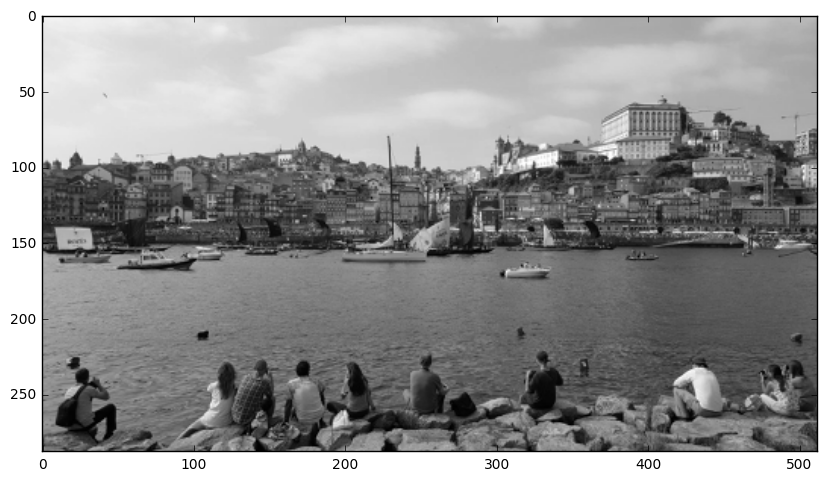

In [4]:
plot_gray(img)

In [5]:
k = np.ones((5,5))
k = k / np.dot(*k.shape)
print(k)
blurred = ndimage.convolve(img, k, mode='constant', cval=0.0)

[[ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]]


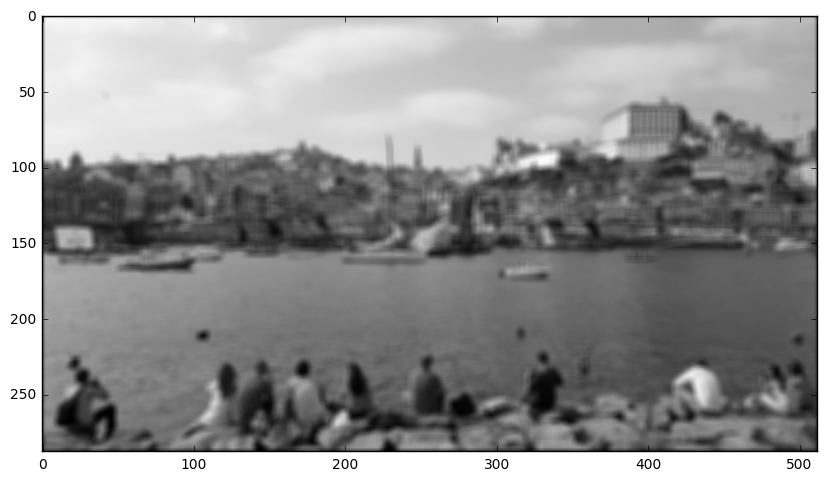

In [6]:
plot_gray(blurred)

In [7]:
k = np.array([[0, -1, 0],
              [-1,14,-1],
              [0, -1, 0]])

sharpen = ndimage.convolve(img, k, mode='constant', cval=0.0)

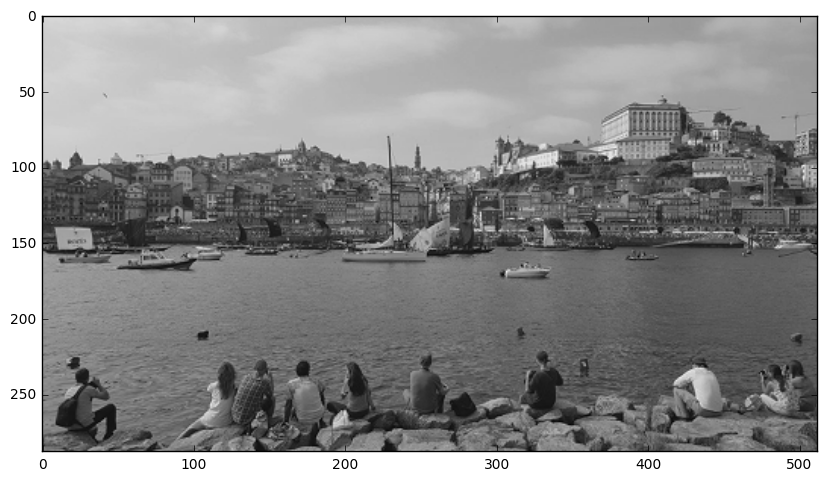

In [8]:
plot_gray(sharpen)

In [9]:
k = np.array([[1.,0.,-1.],
              [0.,0.,0.],
              [-1.,0.,1.]])

edge1 = ndimage.convolve(img, k, mode='constant', cval=0.0)

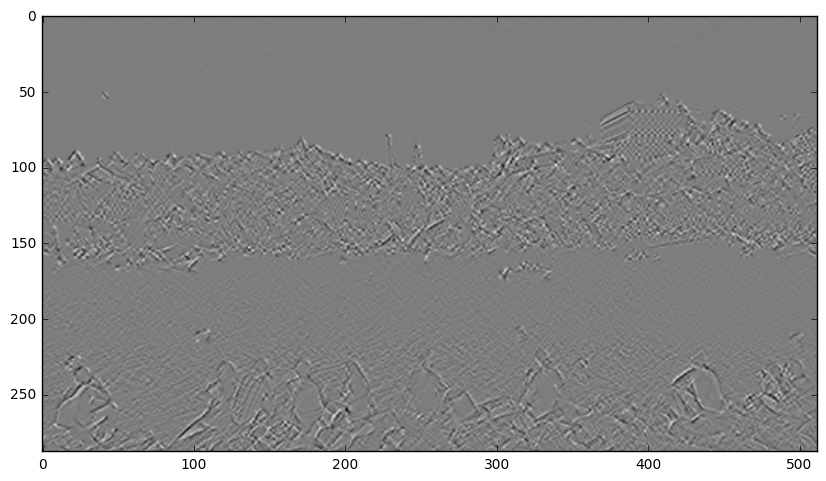

In [10]:
plot_gray(edge1)

In [11]:
k = np.array([[0.,1.,0.],
            [1.,-4.,1.],
            [0.,1.,0.]])

edge2 = ndimage.convolve(img, k, mode='constant', cval=0.0)

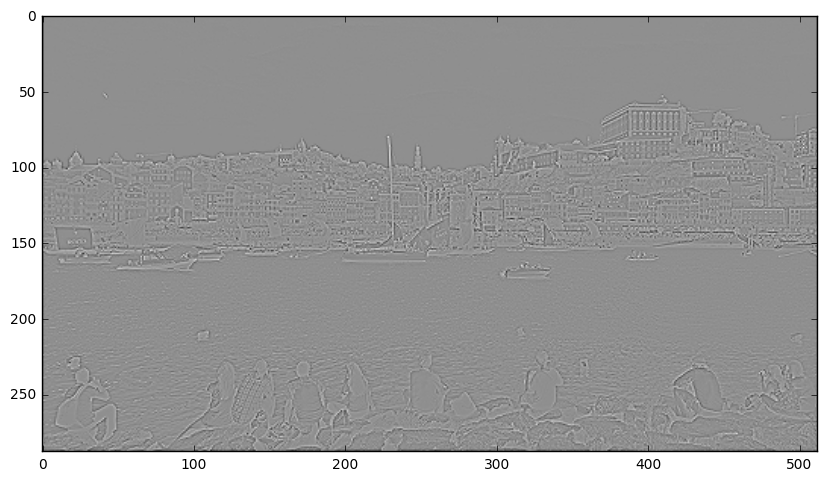

In [12]:
plot_gray(edge2)

In [13]:
k = np.array([[-1.,-1.,-1.],
              [-1.,8.,-1.],
              [-1.,-1.,-1.]])

edge3 = ndimage.convolve(img, k, mode='constant', cval=0.0)

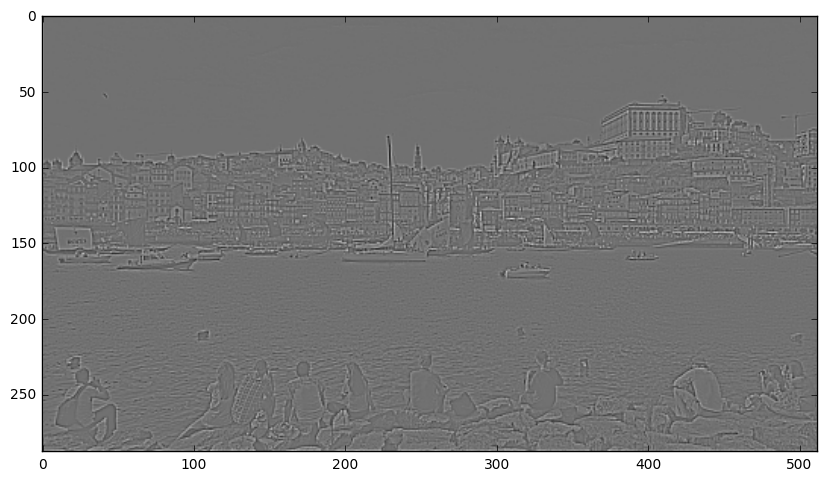

In [14]:
plot_gray(edge3)

In [15]:
k = np.array([[-1, 0, 1],
              [-3, 0, 3],
              [-1, 0, 1],
             ])

sobel_v = ndimage.convolve(img, k, mode='constant', cval=0.0)


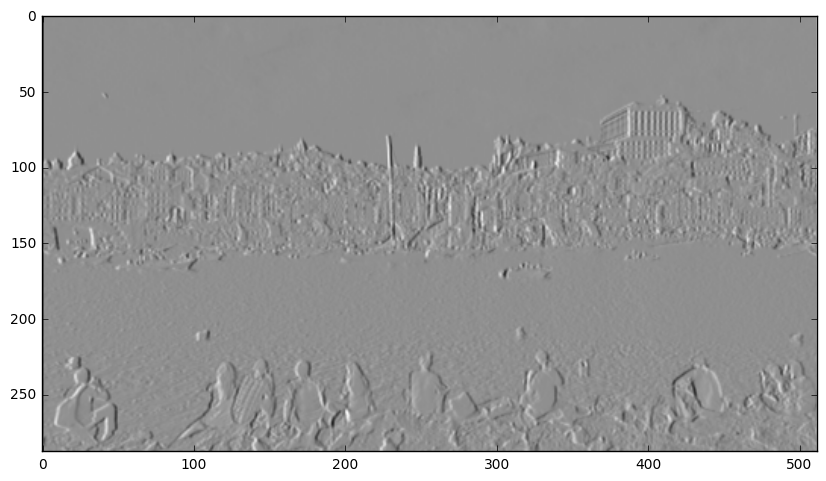

In [16]:
plot_gray(sobel_v / sobel_v.sum())

In [17]:
k = k.T
print(k)

sobel_h = ndimage.convolve(img, k, mode='constant', cval=0.0)


[[-1 -3 -1]
 [ 0  0  0]
 [ 1  3  1]]


https://en.wikipedia.org/wiki/Sobel_operator

# Ако използваме конволюции можем да намалим броя на параметрите:

* За първия скрит слой вместо милиони сега ще имаме само 9 параметъра.
* Вместо да създаваме ръчно филтрите можем да научим теглата им чрез back-propagation.

# За какво се използват CNN?

* Classification
* Object detection
* Segmentation
* Images, Text, Signals, Others

# В керас има клас `Conv2D`, който използваме за създаване на конволюционни филтри за снимки.

`keras.layers.Conv1D(filters, kernel_size, strides=1, padding='valid', dilation_rate=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)`

# Параметри:

* `filters` - броя на филтрите, които искаме да има в скрития слой.
* `kernel_size` - размер на филрите, например `3` или `(3,3)` за `3x3`; `5` или `(5,5)` за `5x5` и т.н.

# `Strides` - стъпка на отместване

* Оказва с каква стъпка да се движи филътра. Стойност по подразбиране `1`.

Stride 1:
![](Stride1.png)

Stride 2: прескача на всеки втори пиксел.
![](Stride2.png)

# Padding

* Когато правим конволюции размера на снимката намалява.
* Ако искаме да запазим оригиналния размер след прилагане на филтрите трябва да добавим рамка (нулеви пиксели) около снимката (padding).
* Възможните параметри са: `valid` (без padding) и `same` (с padding).
![](padding2.png)

# Какво се случва ако снимката е RGB (3 канала)?

* Тогава всеки филтър се прилага и по 3те канала едновременно.
* Така `3x3` филтър ще има `27` параметъра за 3x3 patch и 3 канала.
* Имаме 3x3x3 пиксела в патча - съответно имаме 27 тегла, чрез които да ги умножим.
* Можем да си предствавим, че филтърът вече е 3D. (Продължваме да ползваме Conv2D класа)

# Имаме 10 филтъра.
* Какъв брой канали ще върне конволюционния слой?

# Връща нова "снимка" или по-точно фичъри (feature map) с 10 канала. 
* Следващия конволюционнен слой ще има 3x3x10 параметъра, аналогично като при 3-каналния RGB.

# 1x1 Convolutions
* Специален тип филтър. 
* Използва се за разширяване или намаляване на броя на каналите.
* Показва подобрение на моделите в някои от последните статии.

# Пресмятане на размерите след конволюциите:

Има точна формула, чрез която да пресмятаме размера на изходните размери:

$$ O = \frac{( W - K + 2P)}{S} + 1$$
 

* $O$ – изходната ширина/дължина.
* $W$ – входната ширина/дължина.
* $K$ – размера на филтъра.
* $P$ – Размера на "padding".
* $S$ – Размера на стъпката (stride).

# Пример:

* снимка 32x32 с 3 канала.
* 10 филтъра с големина 3x3
* без паддинг и стъпка 1

$$ O = \frac{ 32 - 3 + 2*0}{1} + 1 = 30 $$

Padding 1:

$$ O = \frac{ 32 - 3 + 2*1}{1} + 1 = 32 $$

Новия брой филтри си остава винаги 10.

Padding 1 и stride 2:

$$ O = \frac{ 32 - 3 + 2*1}{2} + 1 = 16 $$


# Колко трябва да е padding-a за да имаме `SAME` output с филтър 5x5 и stride 1?

$$ O = \frac{ 32 - 5 + 2*2}{1} + 1 = 32 $$


# Max pooling

* Работи сходно на филтрите - чрез конволюции, но няма тегла за трениране.
* От текущия патч взима само максималната стойност на фичърите.
* Намалява размера на "снимката".
* Прави feature selection.

![](maxpool.jpeg)

# Какво се случва с градиентите на теглата от които са получените стойностите след прилагане на max-pooling? 

* Активациите които са избрани от `max-pooling` си имат нормнални градиенти.
* Съответно теглата им ще бъдат обновени от back-propagation.
* Градиента за теглата пропуснати от max-pooling няма да бъдат добавени в пресмятането на обновяването.
* Всъщност те са едни и същи тегла променливи (тегла), но ще бъдат обновени с градиентите само там където са били активирани от max-pooling.


# Последните слоеве на мрежата

* След послените конволюциции отново ще имаме плътни (dense) слоеве.
* За да направим класификация трябва да съберем всичките фичъри от каналите в един слой.
* Най-лесно се прави, чрез класа `Flatten`.
* `Flatten` конкатенира каналите в един.

# Визуализация на CNN:

![](convnet_le_cun.jpg)


# Да видим как се прави CNN с керас:
* Ще сравним два модела: FNN и CNN

In [100]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.optimizers import Adam

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


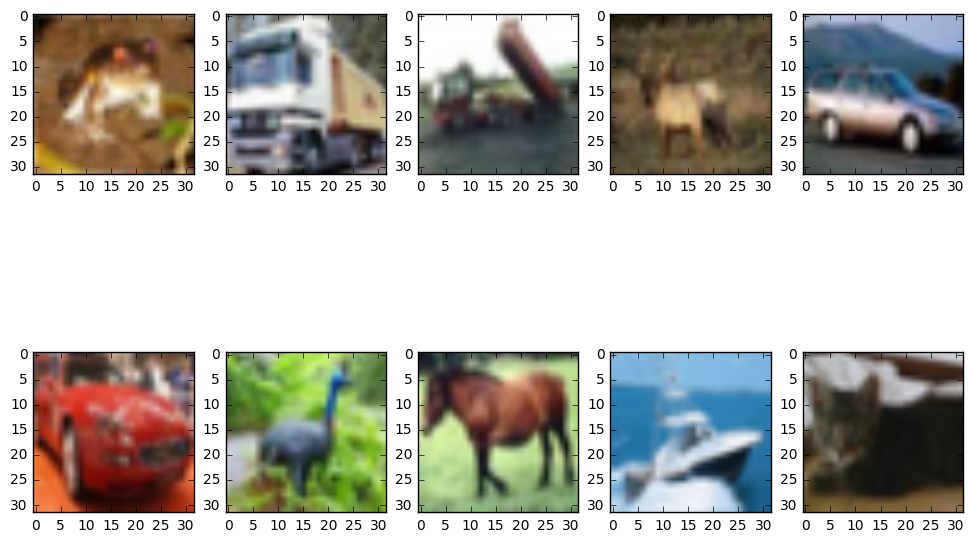

In [21]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])

In [40]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(3072,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_15 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 3,624,610
Trainable params: 3,624,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train.reshape(50000, -1), y_train,
          batch_size=1024,
          epochs=10,
          validation_data=(x_test.reshape(10000, -1), y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1s - loss: 14.5075 - acc: 0.0995 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/10
50000/50000 [=======================

In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])


In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [48]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 25s - loss: 3.6175 - acc: 0.2699 - val_loss: 1.6622 - val_acc: 0.4105
Epoch 2/10
50000/50000 [==============================] - 25s - loss: 1.5864 - acc: 0.4196 - val_loss: 1.3938 - val_acc: 0.5022
Epoch 3/10
50000/50000 [==============================] - 25s - loss: 1.4191 - acc: 0.4869 - val_loss: 1.2626 - val_acc: 0.5572
Epoch 4/10
50000/50000 [==============================] - 25s - loss: 1.2973 - acc: 0.5377 - val_loss: 1.1807 - val_acc: 0.5802
Epoch 5/10
50000/50000 [==============================] - 25s - loss: 1.1921 - acc: 0.5752 - val_loss: 1.0795 - val_acc: 0.6225
Epoch 6/10
50000/50000 [==============================] - 25s - loss: 1.1136 - acc: 0.6059 - val_loss: 1.0277 - val_acc: 0.6443
Epoch 7/10
50000/50000 [==============================] - 25s - loss: 1.0359 - acc: 0.6342 - val_loss: 0.9298 - val_acc: 0.6795
Epoch 8/10
50000/50000 [==============================

# Keras Data Augmentation

In [49]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

Using real-time data augmentation.


In [54]:
model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=256),
                    epochs=5,
                    steps_per_epoch=50000/256,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/2
196/195 [==============================] - 44s - loss: 0.9515 - acc: 0.6682 - val_loss: 0.7999 - val_acc: 0.7252
Epoch 2/2
196/195 [==============================] - 43s - loss: 0.9509 - acc: 0.6679 - val_loss: 0.8175 - val_acc: 0.7221


# Разпознаване на пътни знаци
* https://github.com/lachezarbozhkov/traffic-signs/blob/master/Traffic_Signs_Recognition.ipynb


In [58]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580ad86d_train/train.p
!wget https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580ad89e_test/test.p

--2018-01-04 13:25:42--  https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580ad86d_train/train.p
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 52.85.200.128, 52.85.200.143, 52.85.200.200, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|52.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120489496 (115M)
Saving to: ‘train.p.1’

train.p.1           100%[===================>] 114.91M  69.2MB/s    in 1.7s    

2018-01-04 13:25:44 (69.2 MB/s) - ‘train.p.1’ saved [120489496/120489496]

--2018-01-04 13:25:44--  https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580ad89e_test/test.p
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 52.85.200.128, 52.85.200.143, 52.85.200.200, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|52.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38812229 (37M)
Sa

In [72]:
!wget https://raw.githubusercontent.com/lachezarbozhkov/traffic-signs/master/signnames.csv

--2018-01-04 13:30:54--  https://raw.githubusercontent.com/lachezarbozhkov/traffic-signs/master/signnames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.60.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.60.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999 [text/plain]
Saving to: ‘signnames.csv’

signnames.csv       100%[===================>]     999  --.-KB/s    in 0s      

2018-01-04 13:30:54 (121 MB/s) - ‘signnames.csv’ saved [999/999]



In [60]:
# Load pickled data
import pickle

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
train.keys()

dict_keys(['features', 'labels'])

In [105]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [63]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

image_shape = X_train.shape[1:]
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [135]:
signnames = pd.read_csv("signnames.csv", index_col=["ClassId"])
signnames

SignName
ClassId                                                   
0                                     Speed limit (20km/h)
1                                     Speed limit (30km/h)
2                                     Speed limit (50km/h)
3                                     Speed limit (60km/h)
4                                     Speed limit (70km/h)
5                                     Speed limit (80km/h)
6                              End of speed limit (80km/h)
7                                    Speed limit (100km/h)
8                                    Speed limit (120km/h)
9                                               No passing
10            No passing for vechiles over 3.5 metric tons
11                   Right-of-way at the next intersection
12                                           Priority road
13                                                   Yield
14                                                    Stop
15                                             No vechiles
16                Vechiles over 3.5 metric tons prohibited
17                                                No entry
18                                         General caution
19                             Dangerous curve to the left
20                            Dangerous curve to the right
21                                            Double curve
22                                              Bumpy road
23                                           Slippery road
24                               Road narrows on the right
25                                               Road work
26                                         Traffic signals
27                                             Pedestrians
28                                       Children crossing
29                                       Bicycles crossing
30                                      Beware of ice/snow
31                                   Wild animals crossing
32                     End of all speed and passing limits
33                                        Turn right ahead
34                                         Turn left ahead
35                                              Ahead only
36                                    Go straight or right
37                                     Go straight or left
38                                              Keep right
39                                               Keep left
40                                    Roundabout mandatory
41                                       End of no passing
42       End of no passing by vechiles over 3.5 metric ...

In [137]:
import math

# Plot 9 random images from train set
def plot_9_singns():
    plt.figure(figsize=(14, 14))
    for i in range(1, 10):
        plt.subplot(3, 3, i)
        img = np.random.randint(2, high=n_train)
        plt.imshow(X_train[img, :, :, :]) 
        plt.title(signnames.SignName.loc[y_train[img]])
        
        
# Plot 1st image from each class
def plot_first_image_each_class():
    plt.figure(figsize=(15, 5*math.ceil(n_classes/3)))
    n_freq = list(zip(*np.unique(y_train, return_counts=True)))

    for i, n_ in enumerate(n_freq):
        n, freq = n_
        img = np.argmax(y_train == n)
        plt.subplot(math.ceil(n_classes/3), 3, i+1)
        plt.imshow(X_train[img,:,:,:]) 
        plt.title(signnames.SignName.loc[y_train[img]] + ", count: " + str(freq))

def plot_labels_histogram():
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    n_freq = np.unique(y_train, return_counts=True)
    plt.bar(n_freq[0], n_freq[1])
    plt.title("Distribution of different type of signs - Train set")
    plt.subplot(1,2,2)
    n_freq = np.unique(y_test, return_counts=True)
    plt.bar(n_freq[0], n_freq[1])
    plt.title("Distribution of different type of signs - Test set")

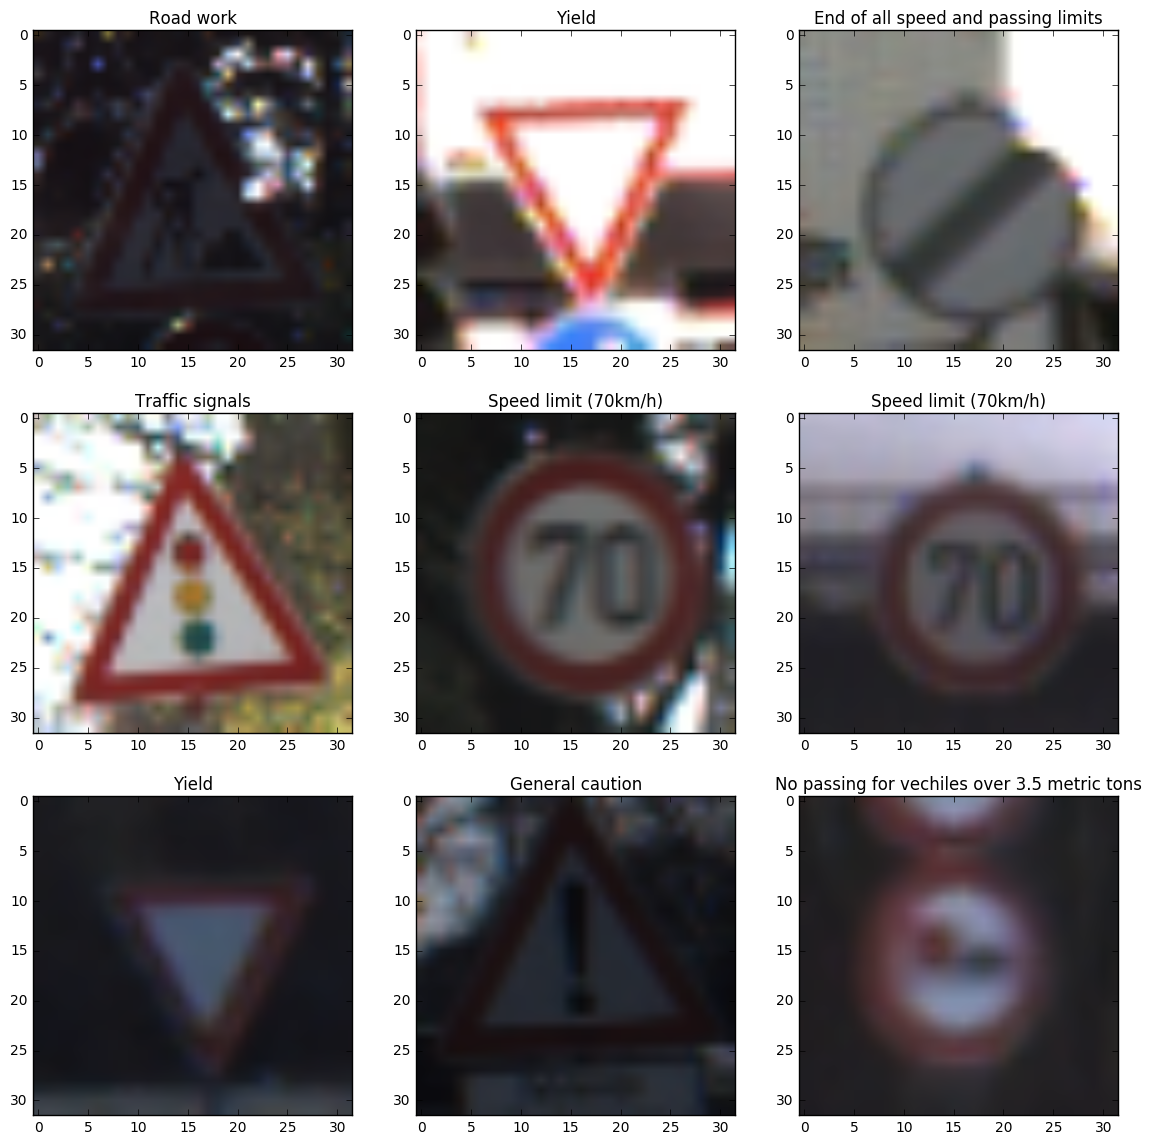

In [78]:
plot_9_singns()

In [139]:
# plot_first_image_each_class()

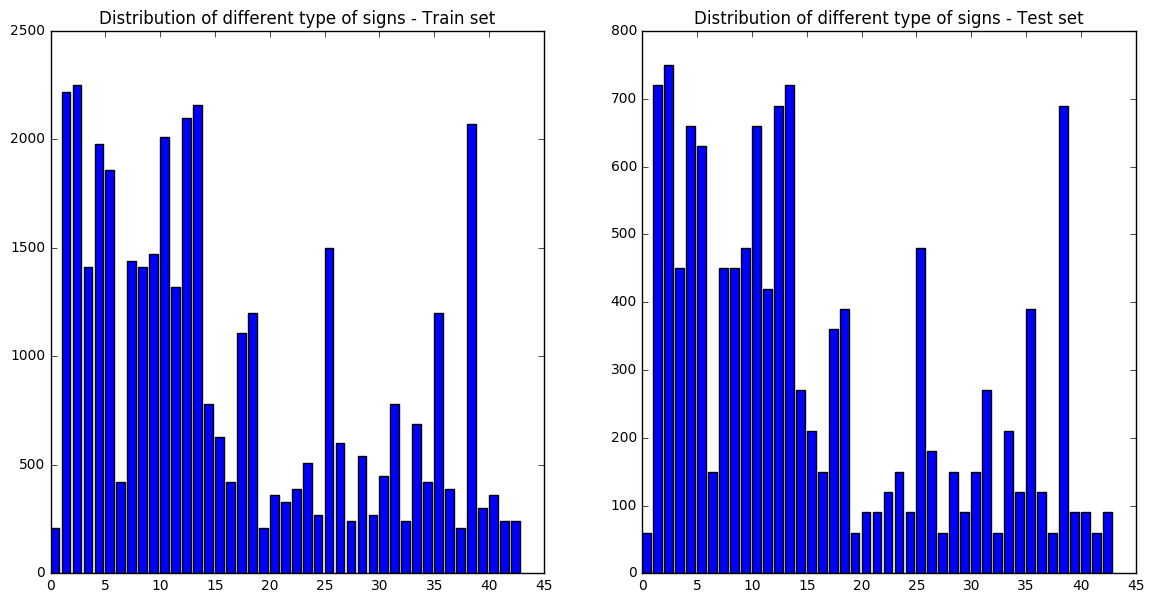

In [94]:
plot_labels_histogram()

In [106]:
print(max(y_train))

42


In [108]:
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

In [134]:
inputs = Input(shape=(32, 32, 3,))

x = Conv2D(64, 5, padding='same', activation='elu')(inputs)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(128, 5, padding='same', activation='elu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(256, 5, padding='same', activation='elu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(512, 5, padding='same', activation='elu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(1000, activation='elu')(x)
x = Dropout(0.25)(x)

x = Dense(43, activation='softmax')(x)

In [111]:
model = Model(inputs=inputs, outputs=x)
model.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 128)         0         
__________

In [113]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, y_test))

Train on 39209 samples, validate on 12630 samples
Epoch 1/10
39209/39209 [==============================] - 33s - loss: 1.4546 - acc: 0.5622 - val_loss: 0.8837 - val_acc: 0.7142
Epoch 2/10
39209/39209 [==============================] - 32s - loss: 0.6129 - acc: 0.8060 - val_loss: 0.5317 - val_acc: 0.8263.8
Epoch 3/10
39209/39209 [==============================] - 32s - loss: 0.3144 - acc: 0.9007 - val_loss: 0.3899 - val_acc: 0.8793
Epoch 4/10
39209/39209 [==============================] - 32s - loss: 0.1928 - acc: 0.9394 - val_loss: 0.3149 - val_acc: 0.9044
Epoch 5/10
39209/39209 [==============================] - 32s - loss: 0.1282 - acc: 0.9596 - val_loss: 0.2985 - val_acc: 0.9109
Epoch 6/10
39209/39209 [==============================] - 32s - loss: 0.0916 - acc: 0.9710 - val_loss: 0.2270 - val_acc: 0.9317
Epoch 7/10
39209/39209 [==============================] - 32s - loss: 0.0669 - acc: 0.9792 - val_loss: 0.2523 - val_acc: 0.9251
Epoch 8/10
39209/39209 [============================

# Трябваше ли да правя крос валидация?

# Разпознаване на знаци от мрежата

In [116]:
import glob
files = glob.glob("signs/*")
print(files)

['signs/x1.jpg', 'signs/traffic-sign-frog-crossing-in-the-moravian-karst-moravsky-kras-area-E1MYBF.jpg', 'signs/Caution-traffic-sign-road-bend-2530.jpg', 'signs/depositphotos_1053895-stock-photo-warning-traffic-sign-rough-road.jpg', 'signs/image.jpg', 'signs/traffic-sign-showing-that-trucks-are-not-allowed-to-enter-EAXM00.jpg', 'signs/x3.jpg', 'signs/41_15_86---Stop-Sign_web.jpg', 'signs/41_07_58---Yield-Road-Traffic-Sign_web.jpg', 'signs/dubai-traffic-sign-great-mosque-A4HWEN.jpg', 'signs/traffic-sign-992648_1280.jpg', 'signs/x2.jpg', 'signs/stop_sign.jpg', 'signs/1200px-Thailand_Traffic-signs_Warning-sign-01a.jpg', 'signs/8887traffic_sign.jpg', 'signs/2545964-german-traffic-sign.jpg', 'signs/single-file-road-traffic-sign-at-roadworks-CN25BN.jpg', 'signs/41_07_74---Stop-Road-Traffic-Sign_web.jpg', 'signs/x4.jpg']


In [117]:
import os
from scipy import misc

def load_and_resize(f):
    image = misc.imread(f, mode="RGB")
    image = misc.imresize(image, (32,32))
    return image
    
images = np.array([load_and_resize(f) for f in files])
print(images.shape)

/home/rbank/.pyenv/versions/3.5.1/envs/ml-lab/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/rbank/.pyenv/versions/3.5.1/envs/ml-lab/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


(19, 32, 32, 3)


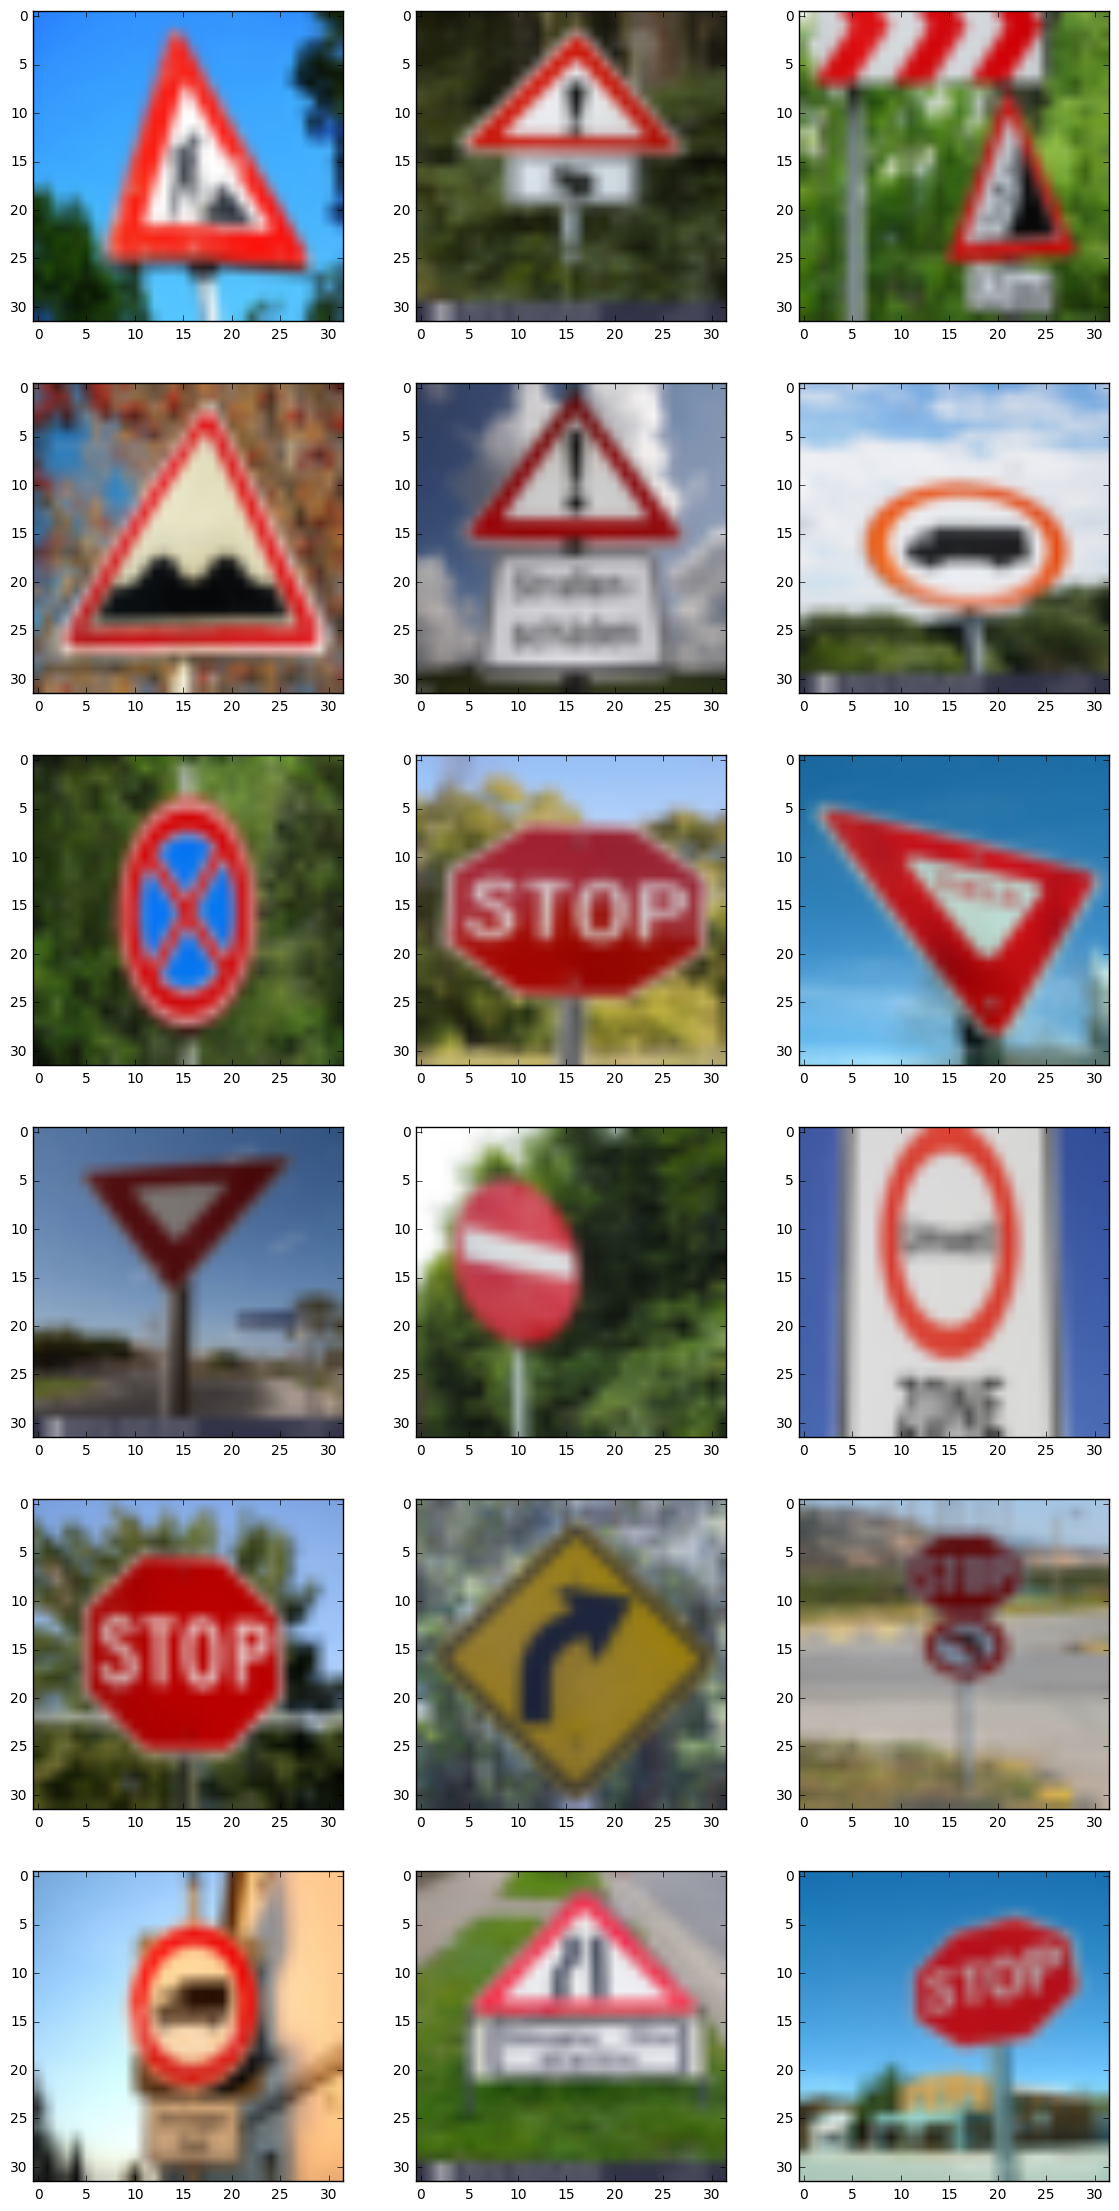

In [119]:
plt.figure(figsize=(14, 28))
for i in range(0, 18):
    plt.subplot(6, 3, i+1)
    plt.imshow(images[i, :, :, :]) 

In [122]:
images_predict = images / 255 - 0.5
predictions = model.predict(images_predict)
predictions_ids = np.argmax(predictions, axis=1)
predictions_ids

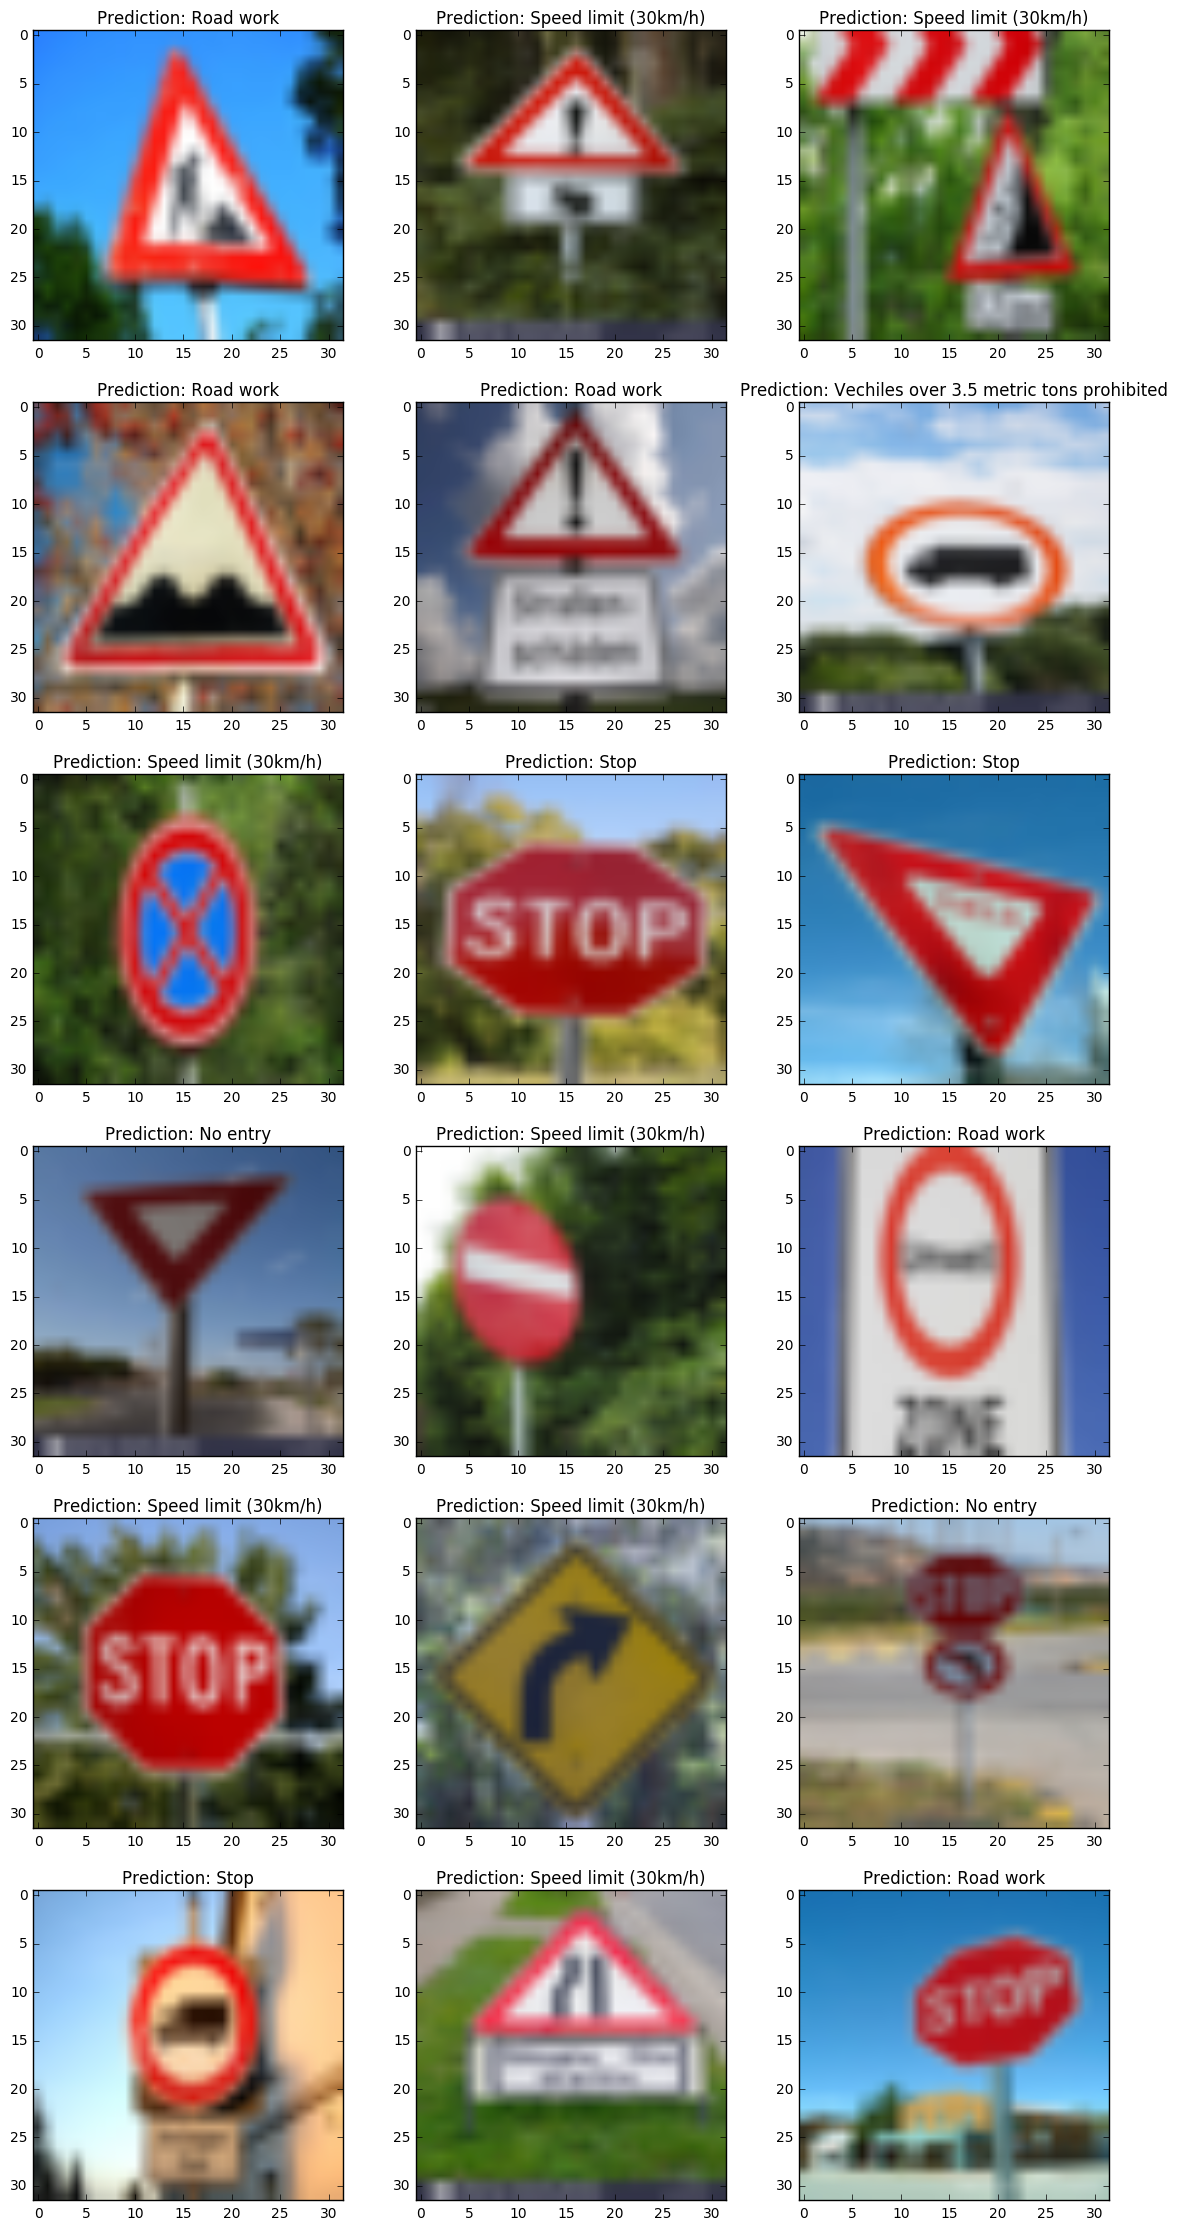

In [127]:
plt.figure(figsize=(14, 28))
for i in range(0, 18):
    plt.subplot(6, 3, i+1)
    plt.imshow(images[i, :, :, :]) 
    plt.title("Prediction: " + signnames.ix[predictions_ids[i]]['SignName'])

# Автономен автомобил

* walk-through
* https://github.com/lachezarbozhkov/Self-Driving-Car-Simulator

# Какво още има за показване с CNN:
    
* Transfer Learning
* Object Localization
* Landmark Detection - face landmarks & AR
* Pose detection
* Object Detection
* Transfer Style
* Face Recognition 
* One Shot Learning
* Siamese Network
* GAN

* http://cs231n.github.io/convolutional-networks/
* https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
* https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/